# Self - Organizing Map

## Training Set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
# Load the dataset
df_players = pd.read_parquet('../data/processed/df_players.parquet')
df_players

,NombreCompleto,Puntos_suma,ReboteDefensivo_suma,ReboteOfensivo_suma,RebotesTotales_suma,Asistencias_suma,Recuperaciones_suma,Perdidas_suma,TaponCometido_suma,TaponRecibido_suma,FaltaCometida_suma,FaltaRecibida_suma,Valoracion_suma,TirosDosAciertos_suma,TirosDosFallos_suma,TirosTresAciertos_suma,TirosTresFallos_suma,TirosLibresAciertos_suma,TirosLibresFallos_suma,plus_minus_suma,posesiones_consumidas_suma,posesiones_jugadas_suma,rebote_of_disp_suma,rebote_def_disp_suma,puntos_q4_y_prorroga_suma,puntos_clutch_suma,posesiones_estimadas_suma,TiempoJuego_seg_suma,TiempoJuego_min_suma,IdJugador,IdClub,IdEquipo,Nombre,TiempoJuego,CincoInicial,equipo,partido_key,nacionalidad,rival,fecha_hora,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,RebotesTotales_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,posesiones_consumidas_prom_40min,posesiones_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,puntos_q4_y_prorroga_prom_40min,puntos_clutch_prom_40min,posesiones_estimadas_prom_40min,TiempoJuego_seg_prom_40min,TiempoJuego_min_prom_40min,TirosDeCampo_suma,TOV%,eFG%,ORB%,DRB%,RB%,FTr,TS%,USG%,AST/TOVr,game_score_suma,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM",261.0,82.0,42.0,124.0,18.0,18.0,25.0,25.0,4.0,60.0,51.0,252.0,79.0,51.0,23.0,74.0,34.0,31.0,98.0,278.0,1508.0,663.0,683.0,104.0,2.0,238.60,37472.0,624.533333,326138,1790,69616,"AALIYA, L.",21:02,False,INSTITUTO,INSTITUTO vs QUIMSA (002/12/2024 22:10),Argentino,QUIMSA,02/12/2024,16.716482,5.251921,2.690009,7.941930,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,6.660974,0.128096,15.281810,2400.0,40.0,227.0,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,51.056338,18.435013,0.720000,233.6,34,6.870588,18.368627
1,"ACEVEDO, MAXIMILIANO JUNIORS",2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,-6.0,4.0,26.0,15.0,10.0,2.0,0.0,3.00,694.0,11.566667,149814,2305,69510,"ACEVEDO, M.",00:00,False,OBERA,OBERA vs RIACHUELO (LR) (001/12/2024 21:00),Argentino,RIACHUELO,01/12/2024,6.916427,3.458213,3.458213,6.916427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.458213,3.458213,6.916427,0.000000,3.458213,0.000000,0.000000,-20.749280,13.832853,89.913545,51.873199,34.582133,6.916427,0.000000,10.374640,2400.0,40.0,4.0,0.000000,25.000000,6.666667,10.000000,8.000000,0.000000,25.000000,15.384615,NaN,1.8,4,0.450000,2.891667
2,"ACEVEDO, SEBASTIAN IGNACIO",285.0,104.0,24.0,128.0,24.0,26.0,30.0,1.0,5.0,84.0,65.0,266.0,55.0,59.0,43.0,76.0,46.0,9.0,-12.0,287.0,2047.0,992.0,828.0,64.0,12.0,263.20,50524.0,842.066667,209965,1426,69281,"ACEVEDO, S.",21:53,True,SAN MARTIN (C),SAN MARTIN (C) vs GIMNASIA (CR) (004/12/2024 2...,Argentino,GIMNASIA,04/12/2024,13.538120,4.940226,1.140052,6.080279,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,3.040139,0.570026,12.502573,2400.0,40.0,233.0,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,55.404355,14.020518,0.800000,239.4,38,6.300000,22.159649
3,"ACTIS, JOAQUIN MATIAS",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.0,1.0,8.0,6.0,3.0,0.0,0.0,1.00,226.0,3.766667,225273,88,69164,"ACTIS, J.",00:00,False,SAN LORENZO,SAN LORENZO vs BOCA (017/11/2024 21:05),Argentino,BOCA,17/11/2024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.619469,0.000000,0.000000,0.000000,0.000000,-10.619469,0.000000,0.000000,0.00000

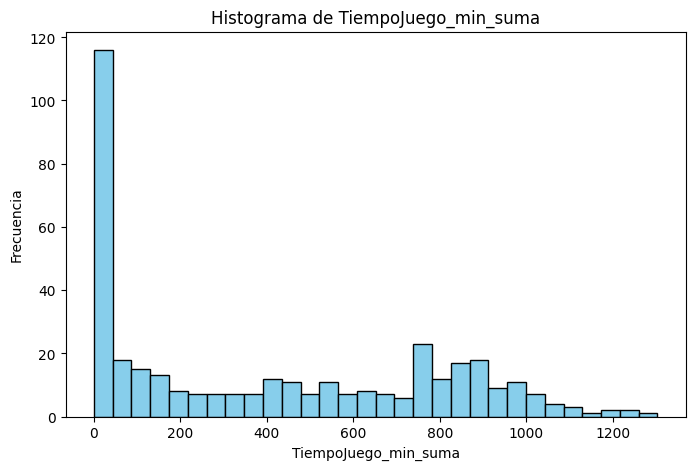

In [4]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['TiempoJuego_min_suma'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('TiempoJuego_min_suma')
plt.ylabel('Frecuencia')
plt.title('Histograma de TiempoJuego_min_suma')
plt.show()

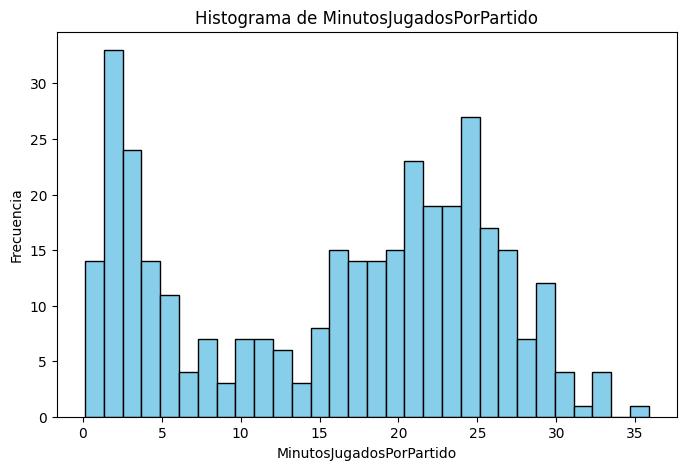

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['MinutosJugadosPorPartido'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('MinutosJugadosPorPartido')
plt.ylabel('Frecuencia')
plt.title('Histograma de MinutosJugadosPorPartido')
plt.show()

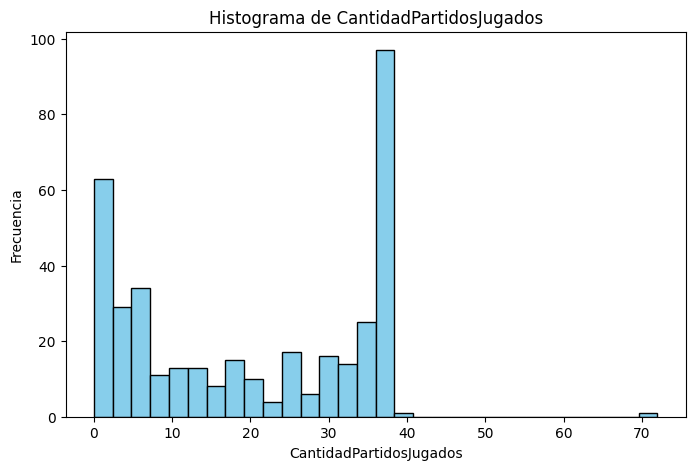

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df_players['CantidadPartidosJugados'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CantidadPartidosJugados')
plt.ylabel('Frecuencia')
plt.title('Histograma de CantidadPartidosJugados')
plt.show()

In [7]:
df_players.shape

(377, 82)

In [8]:
df_players[(df_players['MinutosJugadosPorPartido'] > 6) & (df_players['CantidadPartidosJugados'] > 5)].shape

(237, 82)

Los criterio para mantener a los jugadores en el conjunto de entrenamiento serán:
- Jugadores que hayan disputado más de 5 partido
- Jugadores que hayan disputado más de 6 minutos por partido en promedio

In [9]:
df_train = df_players[(df_players['MinutosJugadosPorPartido'] > 6) & (df_players['CantidadPartidosJugados'] > 5)]


In [10]:
df_train.columns

Index(['NombreCompleto', 'Puntos_suma', 'ReboteDefensivo_suma',
       'ReboteOfensivo_suma', 'RebotesTotales_suma', 'Asistencias_suma',
       'Recuperaciones_suma', 'Perdidas_suma', 'TaponCometido_suma',
       'TaponRecibido_suma', 'FaltaCometida_suma', 'FaltaRecibida_suma',
       'Valoracion_suma', 'TirosDosAciertos_suma', 'TirosDosFallos_suma',
       'TirosTresAciertos_suma', 'TirosTresFallos_suma',
       'TirosLibresAciertos_suma', 'TirosLibresFallos_suma', 'plus_minus_suma',
       'posesiones_consumidas_suma', 'posesiones_jugadas_suma',
       'rebote_of_disp_suma', 'rebote_def_disp_suma',
       'puntos_q4_y_prorroga_suma', 'puntos_clutch_suma',
       'posesiones_estimadas_suma', 'TiempoJuego_seg_suma',
       'TiempoJuego_min_suma', 'IdJugador', 'IdClub', 'IdEquipo', 'Nombre',
       'TiempoJuego', 'CincoInicial', 'equipo', 'partido_key', 'nacionalidad',
       'rival', 'fecha_hora', 'Puntos_prom_40min',
       'ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
  

In [11]:
variables_som = ['NombreCompleto', 'Nombre', 'nacionalidad', 'CincoInicial', 'equipo', 
'Puntos_prom_40min','ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
'Asistencias_prom_40min','Recuperaciones_prom_40min', 'Perdidas_prom_40min',
'TaponCometido_prom_40min', 'TaponRecibido_prom_40min',
'FaltaCometida_prom_40min', 'FaltaRecibida_prom_40min',
'Valoracion_prom_40min', 'TirosDosAciertos_prom_40min',
'TirosDosFallos_prom_40min', 'TirosTresAciertos_prom_40min',
'TirosTresFallos_prom_40min', 'TirosLibresAciertos_prom_40min',
'TirosLibresFallos_prom_40min', 'plus_minus_prom_40min',
'posesiones_consumidas_prom_40min', 'posesiones_jugadas_prom_40min',
'rebote_of_disp_prom_40min', 'rebote_def_disp_prom_40min',
'puntos_q4_y_prorroga_prom_40min', 'puntos_clutch_prom_40min',
'posesiones_estimadas_prom_40min', ''
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', 'TS%', 'USG%', 'AST/TOVr',
'CantidadPartidosJugados', 'game_score_prom','MinutosJugadosPorPartido']
df_train[variables_som]

,NombreCompleto,Nombre,nacionalidad,CincoInicial,equipo,Puntos_prom_40min,ReboteDefensivo_prom_40min,ReboteOfensivo_prom_40min,Asistencias_prom_40min,Recuperaciones_prom_40min,Perdidas_prom_40min,TaponCometido_prom_40min,TaponRecibido_prom_40min,FaltaCometida_prom_40min,FaltaRecibida_prom_40min,Valoracion_prom_40min,TirosDosAciertos_prom_40min,TirosDosFallos_prom_40min,TirosTresAciertos_prom_40min,TirosTresFallos_prom_40min,TirosLibresAciertos_prom_40min,TirosLibresFallos_prom_40min,plus_minus_prom_40min,posesiones_consumidas_prom_40min,posesiones_jugadas_prom_40min,rebote_of_disp_prom_40min,rebote_def_disp_prom_40min,puntos_q4_y_prorroga_prom_40min,puntos_clutch_prom_40min,posesiones_estimadas_prom_40min,TOV%,eFG%,ORB%,DRB%,RB%,FTr,TS%,USG%,AST/TOVr,CantidadPartidosJugados,game_score_prom,MinutosJugadosPorPartido
0,"AALIYA, LEE ABRAHAM","AALIYA, L.",Argentino,False,INSTITUTO,16.716482,5.251921,2.690009,1.152861,1.152861,1.601196,1.601196,0.256191,3.842869,3.266439,16.140051,5.059778,3.266439,1.473100,4.739539,2.177626,1.985482,6.276687,17.805295,96.584116,42.463706,43.744663,6.660974,0.128096,15.281810,8.992806,50.000000,6.334842,12.005857,9.212481,0.149780,51.056338,18.435013,0.720000,34,6.870588,18.368627
2,"ACEVEDO, SEBASTIAN IGNACIO","ACEVEDO, S.",Argentino,True,SAN MARTIN (C),13.538120,4.940226,1.140052,1.140052,1.235057,1.425065,0.047502,0.237511,3.990183,3.087642,12.635579,2.612620,2.802628,2.042594,3.610165,2.185100,0.427520,-0.570026,13.633125,97.236957,47.122160,39.331803,3.040139,0.570026,12.502573,10.452962,51.287554,2.419355,12.560386,7.032967,0.197425,55.404355,14.020518,0.800000,38,6.300000,22.159649
4,"ACUÑA, ROBERTO SANTIAGO","ACUÑA, R.",Argentino,False,INSTITUTO,12.969353,5.784453,2.983560,1.217780,0.974224,1.704891,0.669779,0.608890,4.810229,2.922671,14.491577,5.297341,3.592450,0.121778,0.913335,2.009336,1.400447,6.941344,13.091131,83.539679,36.472498,36.350721,2.922671,0.121778,10.146539,13.023256,55.214724,8.180301,15.912898,12.040134,0.202454,56.757621,15.670554,0.714286,35,5.594286,18.769524
5,"AGUERRE, FEDERICO MATIAS","AGUERRE, F.",Argentino,True,RIACHUELO (LR),13.194345,7.453948,1.456519,1.585035,0.728259,1.370841,0.556904,0.171355,2.955876,3.212909,17.521062,2.184778,2.141939,2.184778,3.427103,2.270456,0.599743,3.084392,12.637441,77.024133,29.987148,38.554905,2.398972,0.342710,11.115808,10.847458,54.956897,4.857143,19.333333,13.000000,0.228448,58.895518,16.407119,1.156250,36,8.366667,25.937037
6,"AGUIRRE, GUSTAVO NICOLAS","AGUIRRE, G.",Argentino,True,REGATAS (C),10.754585,6.478665,0.863822,3.844008,1.338924,1.900409,0.000000,0.129573,2.375511,3.196142,15.160077,2.289128,2.289128,1.554880,4.275919,1.511689,0.345529,0.691058,13.130095,85.302428,37.360304,39.951770,1.814026,0.993395,12.262818,14.473684,44.398340,2.312139,16.216216,9.497207,0.145228,47.899354,15.392405,2.022727,34,7.641176,27.238725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,"WATSON, EARL OVREL","WATSON, E.",Estadounidense,False,ATENAS (C),9.504380,7.200288,5.184207,0.864035,1.728069,2.304092,0.288012,0.576023,2.880115,3.456138,13.536541,4.032161,6.624265,0.000000,0.000000,1.440058,2.304092,-4.608184,14.688588,111.172447,50.978039,48.385935,0.576023,0.000000,9.458298,15.686275,37.837838,10.169492,14.880952,12.463768,0.135135,38.623596,13.212435,0.375000,12,2.966667,11.573611
371,"WHELAN, GASTON","WHELAN, G.",Argentino,True,UNION (SF),19.985110,4.367607,0.727934,4.764662,1.389693,2.779386,0.066176,0.397055,3.904376,7.742576,23.624783,4.897014,3.970552,1.455869,2.713210,5.823476,1.654397,-2.911738,19.058648,85.565390,35.337910,35.404086,6.419059,1.455869,18.378360,14.583333,54.314721,2.059925,12.336449,7.202993,0.446701,61.202983,22.273782,1.714286,23,11.604348,26.280435
372,"WHITFIELD III, ROBERT JAMARCUS","WHITFIELD, R.",Estadounidense,False,GIMNASIA (CR),21.254504,4.250901,0.586331,2.345325,1.465828,2.052

## SOM con 8 nodos

In [18]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

# --- 1. PREPARACIÓN DE DATOS ---


# Seleccionamos solo las variables numéricas para el entrenamiento
features_para_som = [ 
'TOV%', 'eFG%', 'ORB%', 'DRB%', 'RB%', 'FTr', 'TS%', 'USG%', 'AST/TOVr', 
'game_score_prom','MinutosJugadosPorPartido'
]

# Creamos el set de datos con las variables correctas
df_som = df_train[features_para_som]

# Es crucial manejar valores nulos (NaN) antes de escalar
# Aquí los rellenamos con la media de cada columna, pero puedes elegir otra estrategia
df_som = df_som.fillna(df_som.mean())

# Convertimos los datos a un array de NumPy
df_som_np = df_som.values

# Escalamos los datos: fundamental para que ninguna variable domine por su escala
scaler = StandardScaler()
scaled_df_som = scaler.fit_transform(df_som_np)

# --- 2. INICIALIZACIÓN Y ENTRENAMIENTO DEL SOM ---

# Definimos las dimensiones del SOM para tener 8 nodos (4x2 = 8)
som_x = 3
som_y = 3
n_features = scaled_df_som.shape[1] # Número de variables estadísticas

# Inicializamos el SOM
# sigma: radio de la vecindad
# learning_rate: tasa de aprendizaje
# random_seed: para que los resultados sean reproducibles
som = MiniSom(x=som_x, y=som_y, 
              input_len=n_features, 
              sigma=1.0, 
              learning_rate=0.5, 
              random_seed=1511)

# Inicializamos los pesos del SOM
som.random_weights_init(scaled_df_som)

print("Entrenando el SOM...")
# Entrenamos el SOM con nuestros datos
# num_iteration puede ajustarse para mejorar el resultado
som.train_random(data=scaled_df_som, num_iteration=1000)
print("¡Entrenamiento completado!")

# --- 3. OBTENCIÓN DE RESULTADOS ---

# Obtenemos el nodo "ganador" (el más parecido) para cada jugador
winning_nodes = [som.winner(x) for x in scaled_df_som]

# Agregamos las coordenadas del nodo a nuestro DataFrame original
# Esto nos dice a qué grupo (de los 8) pertenece cada jugador
df_train['SOM_Nodo'] = winning_nodes

# Mostramos los primeros resultados
print("\nDataFrame con la asignación de nodos del SOM:")
print(df_train[['NombreCompleto', 'equipo', 'SOM_Nodo']].head())


Entrenando el SOM...
¡Entrenamiento completado!

DataFrame con la asignación de nodos del SOM:
               NombreCompleto          equipo SOM_Nodo
0         AALIYA, LEE ABRAHAM       INSTITUTO   (0, 1)
1  ACEVEDO, SEBASTIAN IGNACIO  SAN MARTIN (C)   (1, 0)
2     ACUÑA, ROBERTO SANTIAGO       INSTITUTO   (2, 1)
3    AGUERRE, FEDERICO MATIAS  RIACHUELO (LR)   (2, 2)
4    AGUIRRE, GUSTAVO NICOLAS     REGATAS (C)   (0, 1)


C:\Users\roman.landa\AppData\Local\Temp\ipykernel_16032\1727009899.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SOM_Nodo'] = winning_nodes


In [19]:
df_train['SOM_Nodo'].value_counts().sort_index()

SOM_Nodo
(0, 0)    18
(0, 1)    37
(0, 2)    29
(1, 0)    23
(1, 1)    23
(1, 2)    42
(2, 0)    21
(2, 1)    18
(2, 2)    26
Name: count, dtype: int64

C:\Users\roman.landa\AppData\Local\Temp\ipykernel_16032\1189008297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['SOM_Nodo_str'] = df_train['SOM_Nodo'].astype(str)



¡Gráficos radiales con variables seleccionadas generados y guardados!


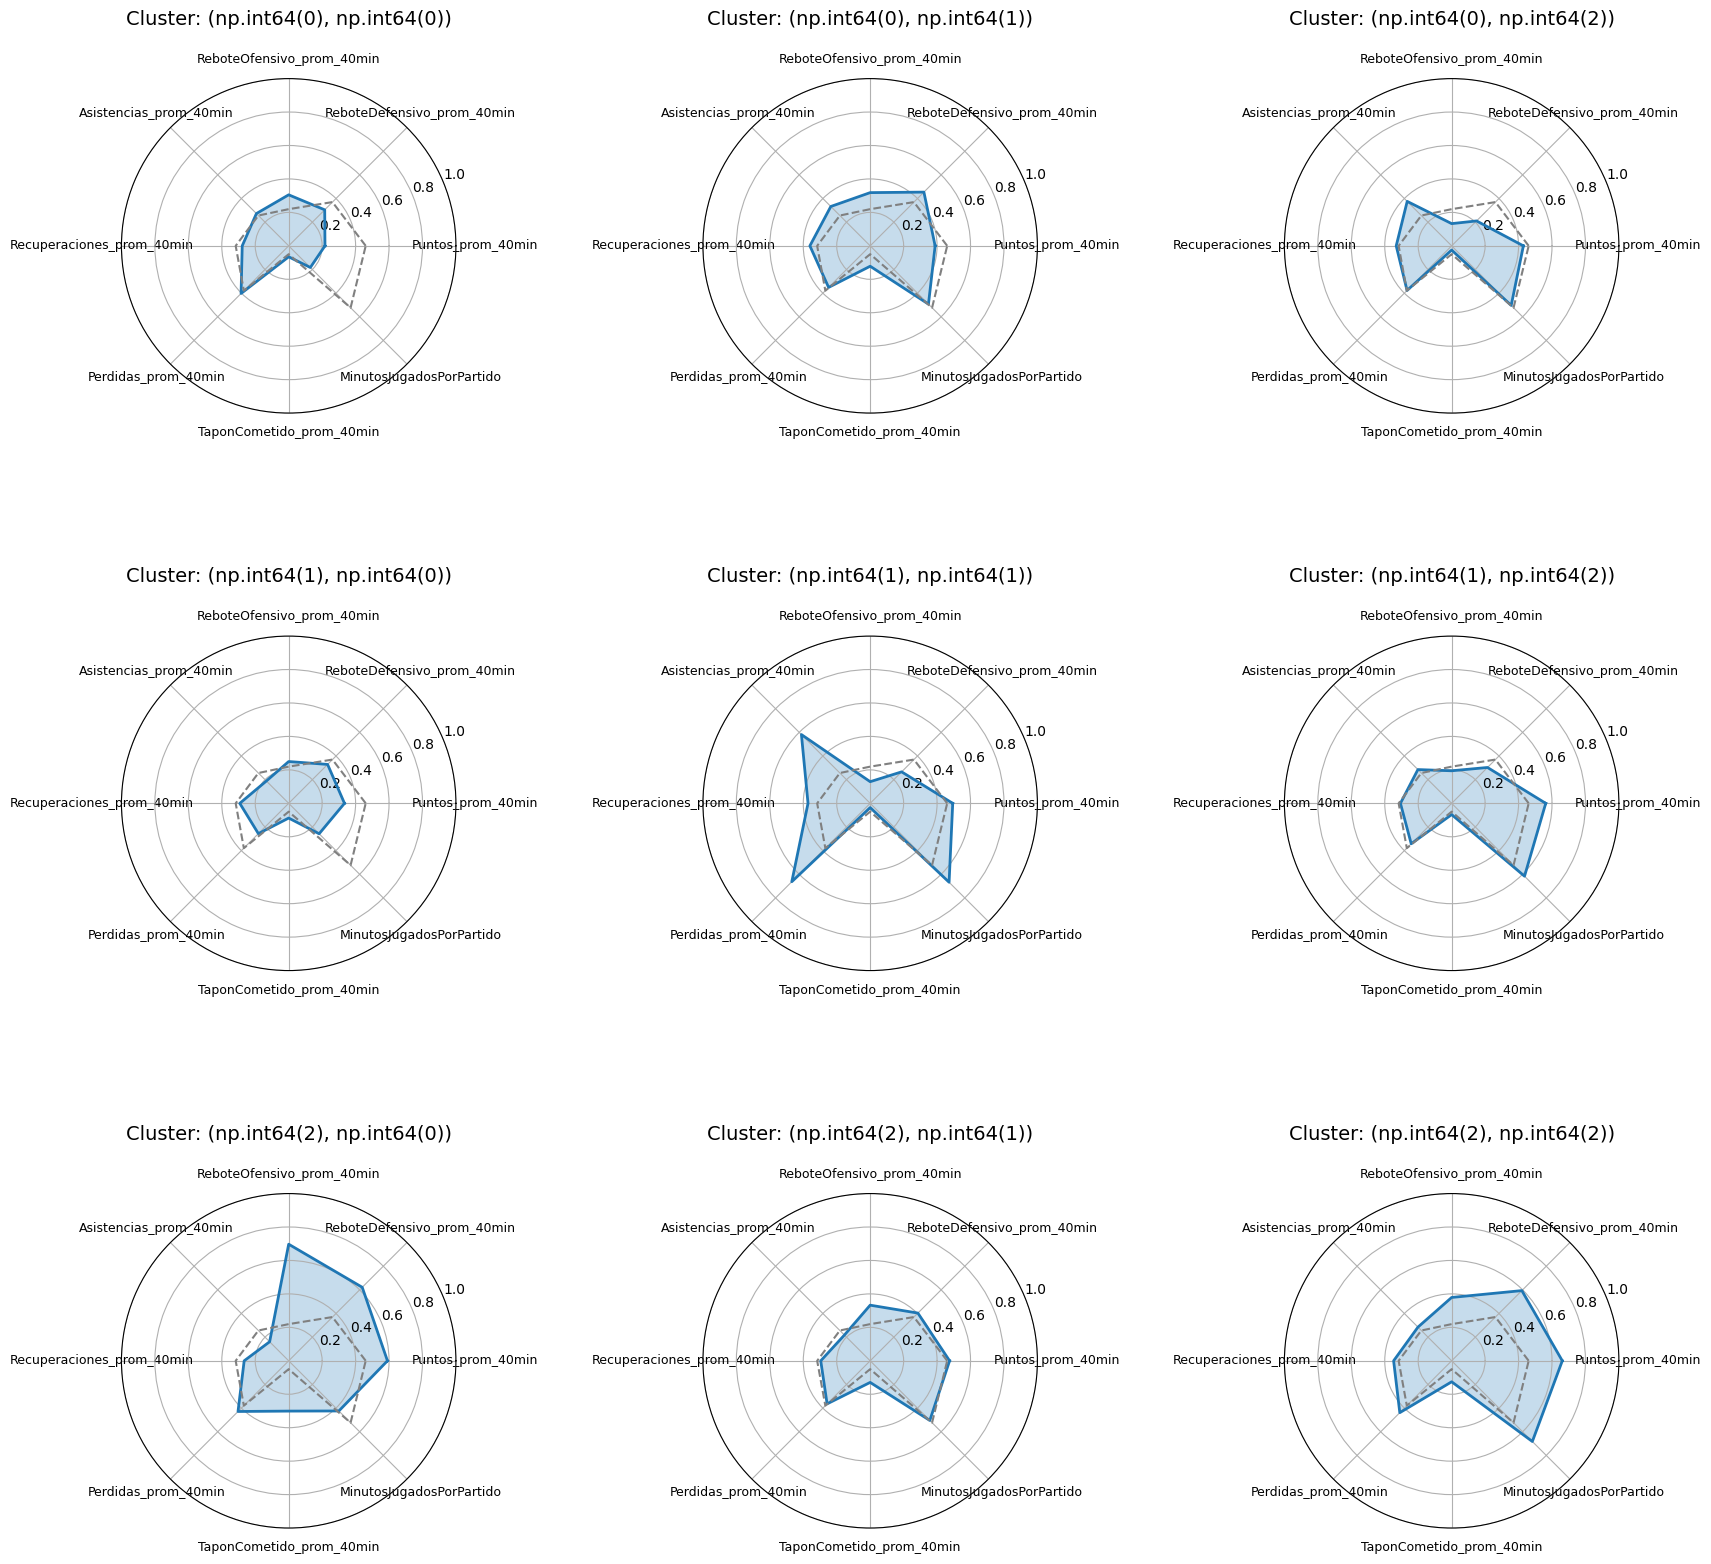

In [20]:
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS PARA LOS GRÁFICOS ---

# ¡CLAVE! Definimos el subconjunto de variables que queremos visualizar
features_para_visualizar = [
    'Puntos_prom_40min','ReboteDefensivo_prom_40min', 'ReboteOfensivo_prom_40min',
'Asistencias_prom_40min','Recuperaciones_prom_40min', 'Perdidas_prom_40min',
'TaponCometido_prom_40min',
    'MinutosJugadosPorPartido'
]

# Creamos el string para agrupar
df_train['SOM_Nodo_str'] = df_train['SOM_Nodo'].astype(str) 

# Calculamos los perfiles promedio SOLO para las variables a visualizar
cluster_profiles = df_train.groupby('SOM_Nodo_str')[features_para_visualizar].mean()

# Calculamos los límites globales SOLO para las variables a visualizar
data_for_stats = df_train[features_para_visualizar].fillna(df_train[features_para_visualizar].mean())
global_min = data_for_stats.min()
global_max = data_for_stats.max()
global_median = data_for_stats.median()

# --- 2. ESCALADO DE DATOS CON LÍMITES GLOBALES ---

# Escalamos los perfiles y la mediana para que sean comparables (escala 0 a 1)
scaled_cluster_profiles = (cluster_profiles - global_min) / (global_max - global_min)
scaled_median = (global_median - global_min) / (global_max - global_min)

# --- 3. PREPARACIÓN PARA LOS GRÁFICOS ---

labels = scaled_cluster_profiles.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

median_values = scaled_median.values.flatten().tolist()
median_values += median_values[:1]

# --- 4. GENERACIÓN DE LOS GRÁFICOS ---

# Ajustamos la grilla al número de nodos (3x3 = 9)
fig, axes = plt.subplots(figsize=(18, 18), nrows=3, ncols=3,
                         subplot_kw=dict(polar=True))
axes = axes.flatten()

# Iteramos sobre los perfiles escalados
for i, (index, row) in enumerate(scaled_cluster_profiles.iterrows()):
    ax = axes[i]
    
    values = row.values.flatten().tolist()
    values += values[:1]
    
    # Graficamos el perfil del cluster
    ax.plot(angles, values, linewidth=2, linestyle='solid', label='Perfil del Cluster')
    ax.fill(angles, values, alpha=0.25)
    
    # Graficamos la mediana global como referencia
    ax.plot(angles, median_values, color='grey', linewidth=1.5, linestyle='--', label='Mediana Global')
    
    # --- 5. CONFIGURACIÓN ESTÉTICA ---
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=9)
    ax.set_title(f"Cluster: {index}", size=14, pad=20)

# Ocultamos los ejes de los subplots que no se usen (si hay menos de 9 clusters)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=2, fontsize=12)
plt.tight_layout(pad=4.0, rect=[0, 0, 1, 0.96])


print("\n¡Gráficos radiales con variables seleccionadas generados y guardados!")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# --- 1. PREPARACIÓN DE DATOS Y CENTROIDES (CORREGIDO) ---

# Aseguramos que el índice esté reseteado para evitar errores de alineación
df_train.reset_index(drop=True, inplace=True)

# Definimos las variables estadísticas (asumiendo que 'features_para_som' ya existe)
# features_para_som = [...]

# Preparamos y escalamos los datos de los jugadores, igual que antes
data_to_scale = df_train[features_para_som].fillna(df_train[features_para_som].mean())
scaler = StandardScaler()
scaled_df_som = scaler.fit_transform(data_to_scale)

# --- LA CORRECCIÓN CLAVE ---
# Creamos un DataFrame temporal con los datos YA ESCALADOS
scaled_df = pd.DataFrame(scaled_df_som, columns=features_para_som)
# Le añadimos la columna de asignación de clúster que generó el SOM
scaled_df['SOM_Nodo_str'] = df_train['SOM_Nodo_str']

# Ahora, calculamos los perfiles promedio (centroides) A PARTIR DE LOS DATOS ESCALADOS.
# Esto asegura que los centroides y los datos de los jugadores estén en la misma escala.
scaled_cluster_profiles = scaled_df.groupby('SOM_Nodo_str')[features_para_som].mean()

print("Calculando los 10 jugadores más representativos de cada clúster...\n")

# --- 2. ITERACIÓN Y CÁLCULO DE SIMILITUD (AHORA CORRECTO) ---

# Iteramos sobre los perfiles de clúster YA ESCALADOS
for cluster_name, cluster_profile_series in scaled_cluster_profiles.iterrows():
    print(f"--- Top 10 Jugadores del Clúster: {cluster_name} ---")
    
    # Obtenemos los índices de los jugadores que pertenecen a este clúster
    indices_jugadores_cluster = df_train[df_train['SOM_Nodo_str'] == cluster_name].index
    
    # Seleccionamos los datos escalados solo para esos jugadores
    datos_escalados_jugadores = scaled_df_som[indices_jugadores_cluster]
    
    # Preparamos el perfil promedio ESCALADO del clúster para el cálculo de distancia
    cluster_profile_array = cluster_profile_series.values.reshape(1, -1)
    
    # Calculamos la distancia euclidiana de CADA jugador al perfil promedio de su clúster
    distancias = cdist(datos_escalados_jugadores, cluster_profile_array, metric='euclidean').flatten()
    
    # Creamos un DataFrame temporal para asociar a cada jugador con su distancia
    jugadores_con_distancia = pd.DataFrame({
        'distancia': distancias
    }, index=indices_jugadores_cluster)
    
    # Ordenamos por la distancia (de menor a mayor) y tomamos los 10 primeros
    top_10_indices = jugadores_con_distancia.sort_values(by='distancia').head(10).index
    
    # Usamos esos índices para obtener los nombres y equipos del DataFrame original
    top_10_jugadores = df_train.loc[top_10_indices][['NombreCompleto', 'equipo', 'nacionalidad']]
    
    # Imprimimos el resultado para este clúster
    print(top_10_jugadores)
    print("\n" + "="*50 + "\n")

Calculando los 10 jugadores más representativos de cada clúster...

--- Top 10 Jugadores del Clúster: (np.int64(0), np.int64(0)) ---
                 NombreCompleto          equipo    nacionalidad
178      QUIROGA, NICOLAS ALEJO           OBERA       Argentino
186       ROLFI, FORTUNATO JOSE          QUIMSA       Argentino
14               ARAUJO, MAXIMO      ATENAS (C)       Argentino
9       ALONSO, GONZALO NICOLAS   LA UNION FSA.       Argentino
78         FIELDS, CALEB JOSEPH           OBRAS  Estadounidense
219  TROCHA MORELOS, TONNY JOSE  RIACHUELO (LR)      Colombiano
126              LATORRE, LUCAS     SAN LORENZO       Argentino
32      BORSATTI, MATIAS DANIEL      UNION (SF)       Argentino
75   FERNANDEZ ALVAREZ, JOAQUIN  RIACHUELO (LR)       Argentino
138                MAGGI, ALEJO   ZARATE BASKET       Argentino


--- Top 10 Jugadores del Clúster: (np.int64(0), np.int64(1)) ---
                  NombreCompleto          equipo    nacionalidad
13           APREA, JULIAN PABL

## Distnacia ENTRE e INTRA grupos

Iniciando el proceso de optimización con Coeficiente de Silueta...

Evaluando 2 clusters...
Coeficiente de Silueta para 2 clusters: 0.2630

Evaluando 3 clusters...
Coeficiente de Silueta para 3 clusters: 0.1582

Evaluando 4 clusters...
Coeficiente de Silueta para 4 clusters: 0.1563

Evaluando 5 clusters...
Coeficiente de Silueta para 5 clusters: 0.1536

Evaluando 6 clusters...
Coeficiente de Silueta para 6 clusters: 0.1935

Evaluando 7 clusters...
Coeficiente de Silueta para 7 clusters: 0.1343

Evaluando 8 clusters...
Coeficiente de Silueta para 8 clusters: 0.1596

Evaluando 9 clusters...
Coeficiente de Silueta para 9 clusters: 0.1541

Evaluando 10 clusters...
Coeficiente de Silueta para 10 clusters: 0.1494

Evaluando 11 clusters...
Coeficiente de Silueta para 11 clusters: 0.1590

Evaluando 12 clusters...
Coeficiente de Silueta para 12 clusters: 0.1594

Evaluando 13 clusters...
Coeficiente de Silueta para 13 clusters: 0.1566

Evaluando 14 clusters...
Coeficiente de Silueta para 14 clus

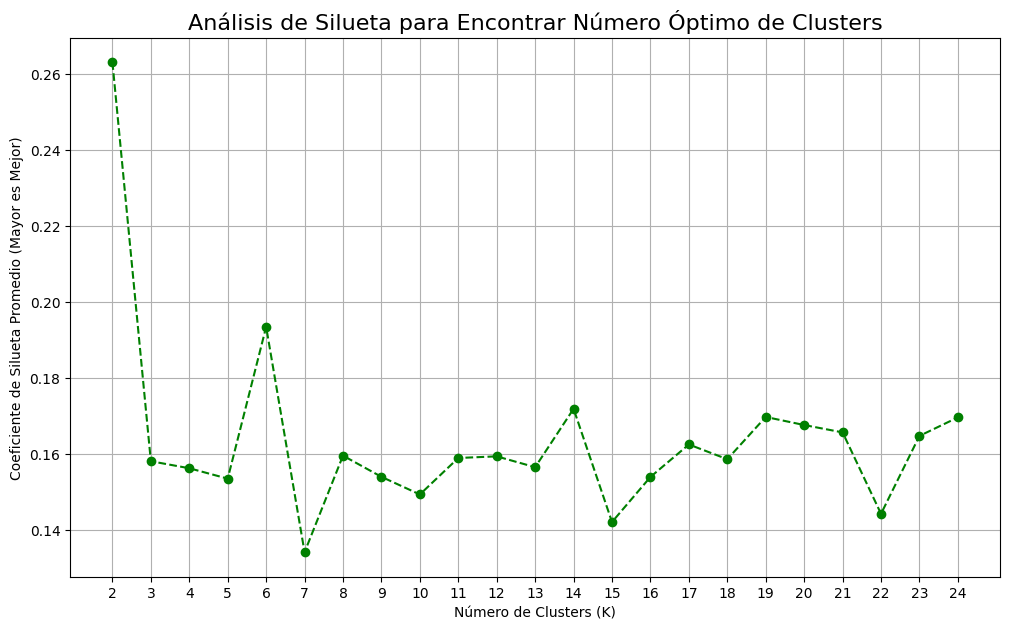


El número óptimo de clusters según el Coeficiente de Silueta es: 2


In [19]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score # ¡Importamos la métrica clave!

# --- 1. PREPARACIÓN DE DATOS (Sin cambios) ---
# Asumimos que 'df_train' ya está cargado

features_para_som = [ 
    'eFG%', 'TOV%', 'ORB%', 'DRB%', 'FTr', 
]
df_som = df_train[features_para_som].fillna(df_train[features_para_som].mean())
scaler = StandardScaler()
scaled_df_som = scaler.fit_transform(df_som.values)

# --- 2. BUCLE DE OPTIMIZACIÓN CON SILHOUETTE SCORE ---

cluster_numbers = list(range(2, 25)) 
grid_map = {
    2: (2,1), 3: (3,1), 4: (2,2), 5: (5,1), 6: (3,2), 7: (7,1), 8: (4,2),
    9: (3,3), 10: (5,2), 11: (11,1), 12: (4,3), 13: (13,1), 14: (7,2), 15: (5,3),
    16: (4,4), 17: (17,1), 18: (6,3), 19: (19,1), 20: (5,4), 21: (7,3), 22: (11,2),
    23: (23,1), 24: (6,4)
}

silhouette_scores = []

print("Iniciando el proceso de optimización con Coeficiente de Silueta...")
for n_clusters in cluster_numbers:
    print(f"\nEvaluando {n_clusters} clusters...")
    
    # a. Entrenar el SOM
    som_x, som_y = grid_map[n_clusters]
    som = MiniSom(x=som_x, y=som_y, input_len=scaled_df_som.shape[1], 
                  sigma=1.0, learning_rate=0.5, random_seed=1511)
    som.random_weights_init(scaled_df_som)
    som.train_random(data=scaled_df_som, num_iteration=1000)
    
    # b. Asignar cada jugador a un cluster
    # En lugar de usar los nodos del SOM directamente, vamos a hacer el clustering final
    # sobre los pesos del SOM entrenado (el enfoque de dos etapas)
    # Esto da una partición más clara.
    
    # Obtenemos los pesos (prototipos) del SOM entrenado
    som_weights = som.get_weights().reshape(-1, scaled_df_som.shape[1])
    
    # Asignamos cada jugador al prototipo más cercano
    cluster_labels = np.argmin(cdist(scaled_df_som, som_weights, 'euclidean'), axis=1)

    # c. Calcular el Coeficiente de Silueta
    # La métrica necesita los datos originales (escalados) y las etiquetas de cluster de cada dato
    score = silhouette_score(scaled_df_som, cluster_labels, metric='euclidean')
    silhouette_scores.append(score)
    print(f"Coeficiente de Silueta para {n_clusters} clusters: {score:.4f}")

print("\n¡Optimización completada!")

# --- 3. VISUALIZACIÓN DE RESULTADOS ---

plt.figure(figsize=(12, 7))
plt.plot(cluster_numbers, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Análisis de Silueta para Encontrar Número Óptimo de Clusters', fontsize=16)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta Promedio (Mayor es Mejor)')
plt.xticks(cluster_numbers)
plt.grid(True)
plt.savefig('optimización_silueta_som.png', dpi=300)
plt.show()

# Encontrar el mejor resultado
best_k = cluster_numbers[np.argmax(silhouette_scores)]
print(f"\nEl número óptimo de clusters según el Coeficiente de Silueta es: {best_k}")